#  U.S. Domestic Flights Operation Evaluation

<a id='intro'></a>
## Data Overview
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. For this evaluation, the first quarter data of 2020 was analysed. It's varaibles include origin state, dest state, diverted, cancelled, cancellation code (reason for cancellation :A = carrier, B = weather, C = NAS, D = security) etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load data to work space
df = pd.read_csv('cleaned_data.csv')

# Make dataframe for flight whose origin is from canada(CA)
df_ca = df[df['origin_state_abr'] == 'CA'].reset_index(drop =True)

## Flight distribution across origin state
This dataset consist of flight with origin from various state of which canada had the maximam count. For my evaluation only flight with origin from canada were analysied 

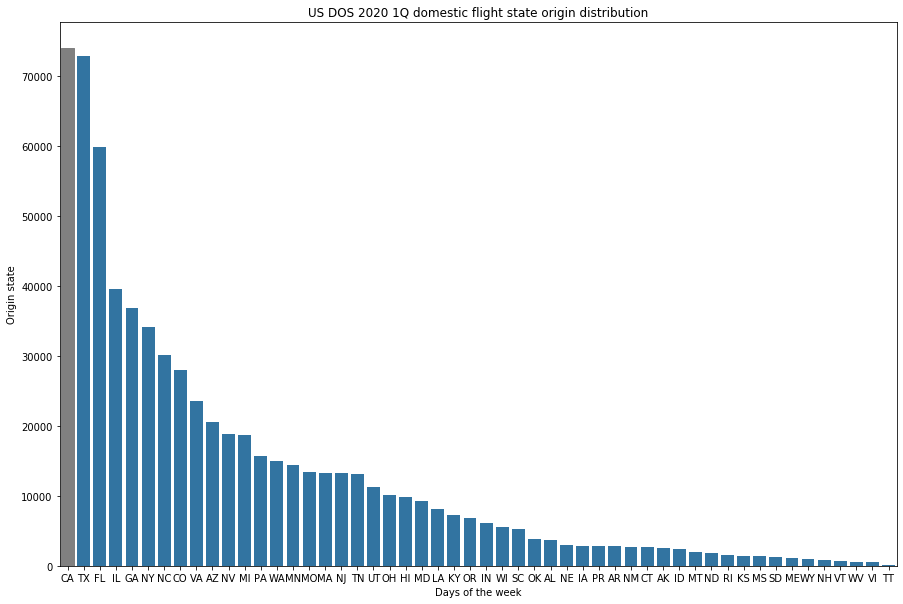

In [3]:

base_color = sb.color_palette()[0]
plt.figure(figsize = [15,10])
sb.countplot(data = df, x ='origin_state_abr', order=df['origin_state_abr'].value_counts().index,
             color = base_color).patches[0].set_color('grey')
plt.xlabel('Days of the week')
plt.ylabel('Origin state')
plt.title('US DOS 2020 1Q domestic flight state origin distribution');


## Data summary for flight whose origin was Canada (CA)
Majority of the flight were successful with only 15.7% issue

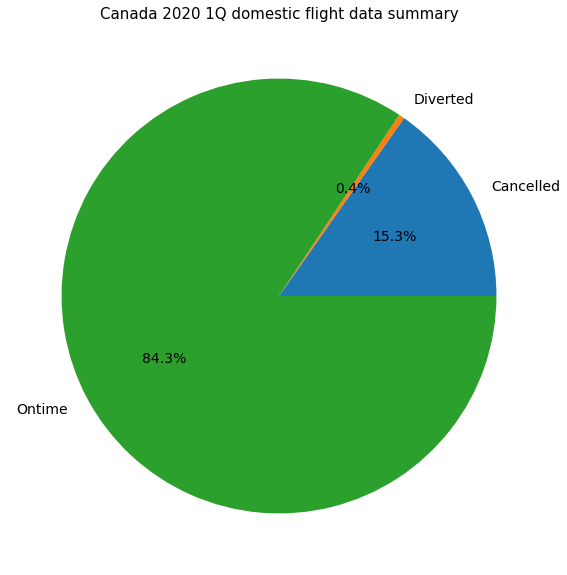

In [4]:
plt.figure(figsize=[18,10])
cancelled = df_ca['cancelled'].sum()
diverted = df_ca['diverted'].sum()
ontime = df_ca['flights'].sum() - cancelled - diverted
summary = [cancelled, diverted, ontime]
plt.pie(summary, labels=['Cancelled', 'Diverted', 'Ontime'], autopct='%1.1f%%', textprops={'fontsize': 14});
plt.title('Canada 2020 1Q domestic flight data summary', fontsize=15);

## Distribution of Canada Flight over months
Most of the flight occurred in march of which more than 25%  of it where cancelled 

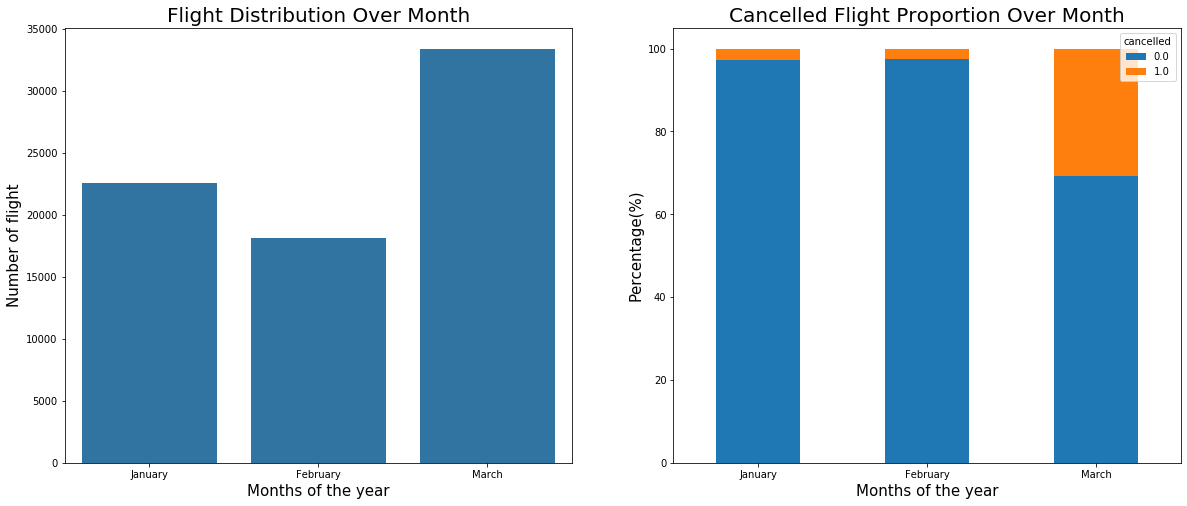

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,8])

# Subplot 1
# Flight distribution over the months of aquired data
plt.subplot(1,2,1)
sb.countplot(data = df_ca, x ='month', color = base_color)
plt.xlabel('Months of the year', fontsize=15)
plt.ylabel('Number of flight', fontsize =15)
plt.title('Flight Distribution Over Month', fontsize=20)

# Subplot 2
# Bar chart showing the relative distribution of approved to cancelled flight across the months
months=['January', 'February', 'March']
sorted_data = df_ca.groupby('month')['cancelled'].value_counts()
sorted_data.unstack().reindex(months).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,2), stacked=True )
plt.title('Cancelled Flight Proportion Over Month', fontsize=20)
plt.xlabel('Months of the year', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Percentage(%)', fontsize =15);

## Cause of flight cancellation in Canada
Security (cancellation code: D) was the major reason for cancelled flight

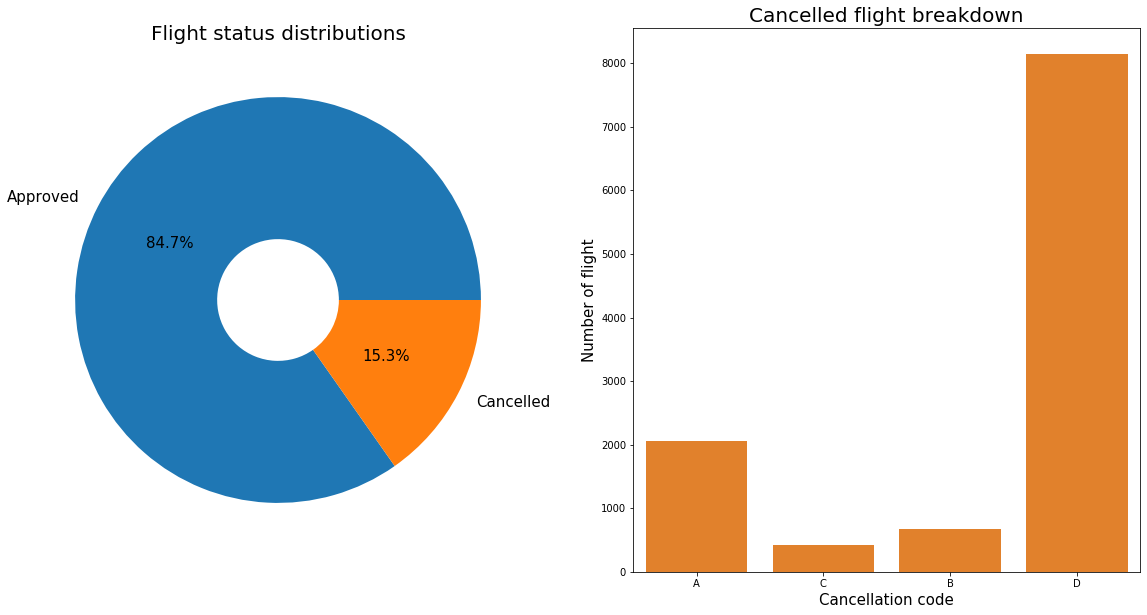

In [6]:
plt.figure(figsize=[20,10])

# Subplot 1
# Flight status distribution
plt.subplot(1,2,1)
cancelled_status_count = df_ca['cancelled'].value_counts()
plt.pie(cancelled_status_count, labels=['Approved','Cancelled'], autopct='%1.1f%%',
        wedgeprops={'width':0.7}, textprops={'fontsize': 15})
plt.title('Flight status distributions', fontsize=20)

# Subplot 2
# Cancelled flight breakdown
plt.subplot(1,2,2)
sb.countplot(data = df_ca, x ='cancellation_code', color = sb.color_palette()[1])
plt.title('Cancelled flight breakdown', fontsize=20)
plt.xlabel('Cancellation code', fontsize=15)
plt.ylabel('Number of flight', fontsize =15);

## Distribution of Cancellation Code Over Month
In January and February, the reason for cancelled flight had similar proportion but during march majority of the flight were cancelled due to security (cancellation code:D) issue

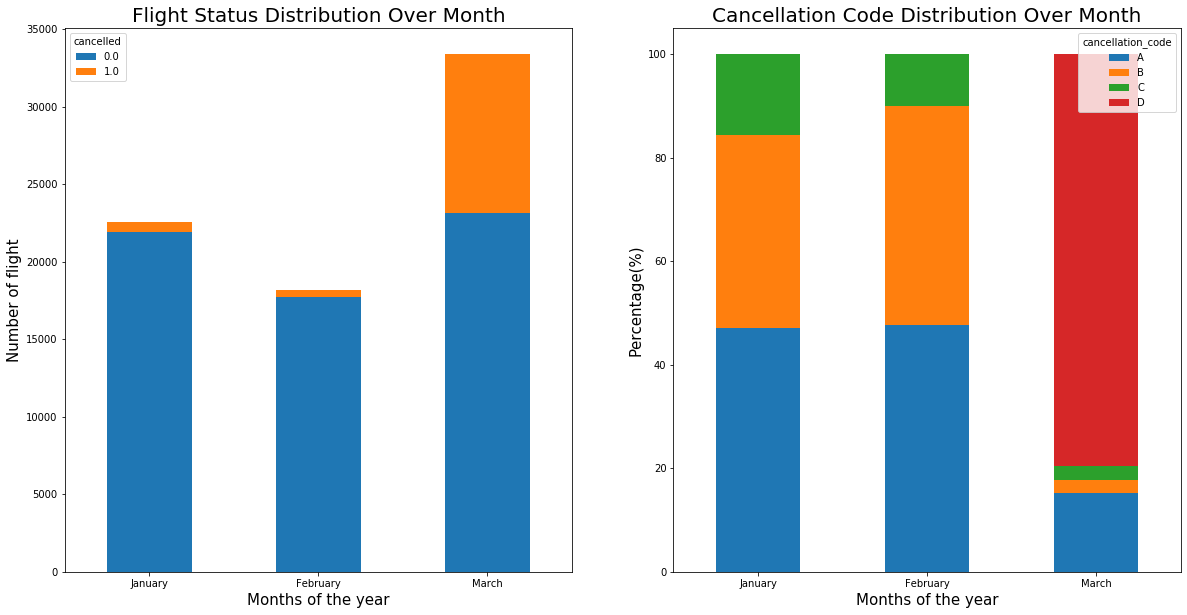

In [7]:
plt.figure(figsize=[20,10])
months=['January', 'February', 'March']
sorted_data = df_ca.groupby('month')['cancelled'].value_counts()
sorted_data.unstack().reindex(months).plot(
    kind='bar', ax=plt.subplot(1,2,1), stacked=True )
plt.xlabel('Months of the year', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Number of flight', fontsize =15)
plt.title('Flight Status Distribution Over Month', fontsize=20)

# Distribution go the cancellation code across the months
months=['January', 'February', 'March']
sorted_data = df_ca.groupby('month')['cancellation_code'].value_counts()
sorted_data.unstack().fillna(0).reindex(months).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,2), stacked=True )
plt.xlabel('Months of the year', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Percentage(%)', fontsize =15)
plt.title('Cancellation Code Distribution Over Month', fontsize=20);

## Relationship between canada flight origin city and cancelled flight
Mammoth Lakes airport had the lowest performance in comparison to the other airport in canada of which more than 40% of their flight were cancelled 

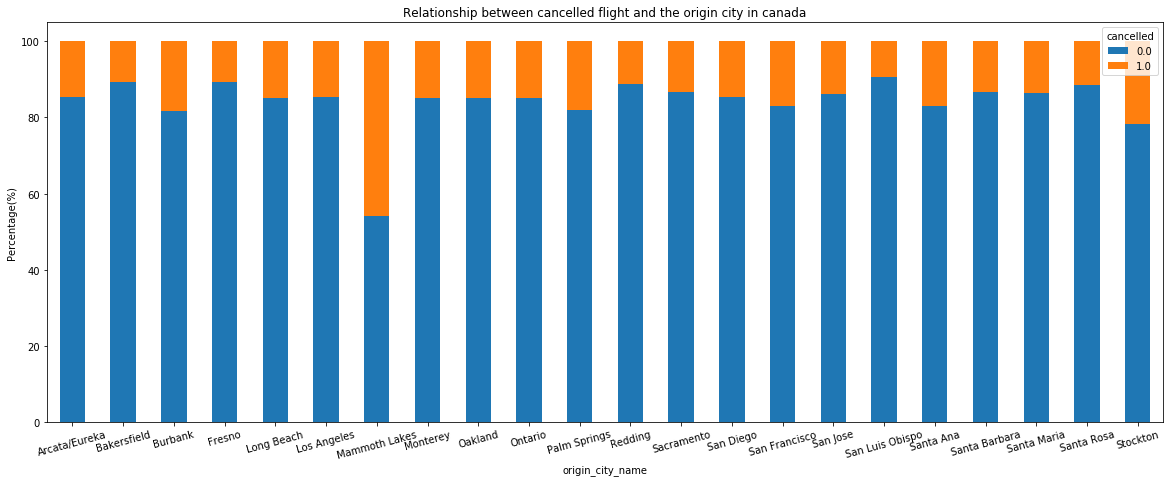

In [8]:
plt.figure(figsize=[20,25])
# Relationship between cancelled flight and the origin city in canada
sorted_data = df_ca.groupby('origin_city_name')['cancelled'].value_counts()
sorted_data.unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(3,1,1), title='Relationship between cancelled flight and the origin city in canada',
    stacked=True )
plt.xticks(rotation=15)
plt.ylabel('Percentage(%)', fontsize =10);

## Recommedation
For the analysis, it could be noted that from march, security is the currently rising issues canada airports, there;
- More effort should be made towards improving the security of canada airports in general
- and also deep investigation should be carried out in mammoth lakes airport since the provide the least efficiency 